<a href="https://colab.research.google.com/github/masadeghi/dementia_clf_fmri/blob/main/experiments/analysis_scripts/fmri_dementia_wt_fe_fs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies

In [ ]:
import os
import gc
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, balanced_accuracy_score

!pip install -qU focal_loss_torch
from focal_loss.focal_loss import FocalLoss

!pip install -qU tsai
from tsai.all import *

!pip install -qU tsfresh
import tsfresh

!pip install -qU PyWavelets
import pywt

!pip install -qU zarr
import zarr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 72.1 MB/s eta 0:00:00


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Import data

In [ ]:
# Mount Google drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Coding projects/resting_fmri_dementia/

/content/gdrive/MyDrive/Coding projects/resting_fmri_dementia


In [ ]:
labels = pd.read_csv('group_csv_files/labels_new.csv')

# Data preprocessing

## Train/val/test split
*These lines have been commented out as their outputs are loaded in from Google Drive later on.*

In [ ]:
# # Splitting out the test set
# labels_train_val, labels_test = train_test_split(labels, test_size = 0.1,
#                                             shuffle = True, random_state = 42,
#                                             stratify = labels['label'])

# # Train/val split
# labels_train, labels_val = train_test_split(labels_train_val, test_size = 0.2,
#                                             shuffle = True, random_state = 42,
#                                             stratify = labels_train_val['label'])

In [ ]:
# labels_train_val = labels_train_val.reset_index(drop = True)
# labels_train = labels_train.reset_index(drop = True)
# labels_val = labels_val.reset_index(drop = True)
# labels_test = labels_test.reset_index(drop = True)

In [ ]:
# labels_train_val.to_csv('group_csv_files/labels_train_val.csv', header = True)
# labels_test.to_csv('group_csv_files/labels_test.csv', header = True)
# labels_train.to_csv('group_csv_files/labels_train.csv', header = True)
# labels_val.to_csv('group_csv_files/labels_val.csv', header = True)

## Standardizing the data
* Get the means and standard deviations across all of the training set fMRIs
* Standardize the whole dataset using the calculated means and standard deviations

*These lines have been commented out as their outputs are loaded in from Google Drive later on.*

In [ ]:
# # Getting all of the training data
# X_train, y_train = get_datasets(labels_train, standardized = False)

In [ ]:
# train_mean = np.mean(X_train)
# train_std = np.std(X_train)
# train_mean, train_std

In [ ]:
# os.makedirs('scaled_data_dir')

In [ ]:
# save_path = "scaled_data_dir"

# for i, row in labels.iterrows():
#   matrix_name = row['matrix']
#   matrix_path = os.path.join('raw_data_dir', matrix_name)
#   matrix_arr = np.genfromtxt(matrix_path, delimiter = ',')
#   matrix_arr_scaled = (matrix_arr - train_mean)/train_std
#   new_path = os.path.join(save_path, matrix_name)
#   np.savetxt(new_path, matrix_arr_scaled, delimiter = ',')

## Function for retrieving .txt datasets in array form

*These lines have been commented out as their outputs are loaded in from Google Drive later on.*

In [ ]:
# def get_datasets(data_csv, standardized = True):

#   X = np.empty((len(data_csv), 200, 140))
#   y = np.empty(len(data_csv))

#   for i, row in data_csv.iterrows():
#     matrix_name = row['matrix']
#     matrix_label = row['label']

#     if standardized:
#       dir_path = 'scaled_data_dir'
#     else:
#       dir_path = 'raw_data_dir'

#     matrix_path = os.path.join(dir_path, matrix_name)
#     matrix_arr = np.genfromtxt(matrix_path, delimiter = ',')
#     matrix_arr = matrix_arr[:200, :140]
#     X[i] = matrix_arr
#     y[i] = matrix_label

#   return X, y

## Load standardized datasets as arrays

*These lines have been commented out as their outputs are loaded in from Google Drive later on.*

In [ ]:
# # Load data from .txt files
# X, y = get_datasets(labels_train_val, standardized = True)
# X_train, y_train = get_datasets(labels_train, standardized = True)
# X_val, y_val = get_datasets(labels_val, standardized = True)
# X_test, y_test = get_datasets(labels_test, standardized = True)

In [ ]:
# # Save to disk
# np.save('scaled_datasets_as_np_arrays/X_train_val.npy', X)
# np.save('scaled_datasets_as_np_arrays/y_train_val.npy', y)

# np.save('scaled_datasets_as_np_arrays/X_train.npy', X_train)
# np.save('scaled_datasets_as_np_arrays/y_train.npy', y_train)

# np.save('scaled_datasets_as_np_arrays/X_val.npy', X_val)
# np.save('scaled_datasets_as_np_arrays/y_val.npy', y_val)

# np.save('scaled_datasets_as_np_arrays/X_test.npy', X_test)
# np.save('scaled_datasets_as_np_arrays/y_test.npy', y_test)

In [ ]:
# del X_train, X_test, X, X_val
# gc.collect()

In [ ]:
# del y_train, y_val, y_test, y
# gc.collect()

## Load arrays

In [ ]:
# Load with memmap
X = np.load('scaled_datasets_as_np_arrays/X_train_val.npy', mmap_mode = 'c')
y = np.load('scaled_datasets_as_np_arrays/y_train_val.npy', mmap_mode = 'c')

# X_train = np.load('scaled_datasets_as_np_arrays/X_train.npy', mmap_mode = 'c')
# y_train = np.load('scaled_datasets_as_np_arrays/y_train.npy', mmap_mode = 'c')

X_val = np.load('scaled_datasets_as_np_arrays/X_val.npy', mmap_mode = 'c')
y_val = np.load('scaled_datasets_as_np_arrays/y_val.npy', mmap_mode = 'c')

# X_test = np.load('scaled_datasets_as_np_arrays/X_test.npy', mmap_mode = 'c')
# y_test = np.load('scaled_datasets_as_np_arrays/y_test.npy', mmap_mode = 'c')

## Removing motion artifacts and despiking

### Visualizing data

In [ ]:
y_ad, y_ftd, y_hc, y_mci = y == 1, y == 2, y == 3, y == 4
X_ad, X_ftd, X_hc, X_mci = X[y_ad], X[y_ftd], X[y_hc], X[y_mci]
ad_idx, ftd_idx, hc_idx, mci_idx = np.where(y_ad)[0], np.where(y_ftd)[0], np.where(y_hc)[0], np.where(y_mci)[0]

In [ ]:
def visualize_samples(disease_class, min_range, max_range, num_rows = 3, num_cols = 3):
  if disease_class == 'AD':
    samples = X_ad
    idxs = ad_idx
  elif disease_class == 'FTD':
    samples = X_ftd
    idxs = ftd_idx
  elif disease_class == 'HC':
    samples = X_hc
    idxs = hc_idx
  elif disease_class == 'MCI':
    samples = X_mci
    idxs = mci_idx

  samples = samples[min_range:max_range]
  idxs = idxs[min_range:max_range]

  fig, axs = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (20, num_rows * 4))
  fig.tight_layout(h_pad = 4)
  fig.suptitle(f"{disease_class} patients", fontsize=18, y = 0.95)
  plt.subplots_adjust(top = 0.9)

  for i, ax in enumerate(axs.ravel()):
    sample = samples[i]
    idx = idxs[i]
    for row_id in range(len(sample)):
      ax.plot(range(140), sample[row_id])
    ax.set_ylim(-20, 20)
    ax.set_title(f"sample: {idx}")
  plt.show()

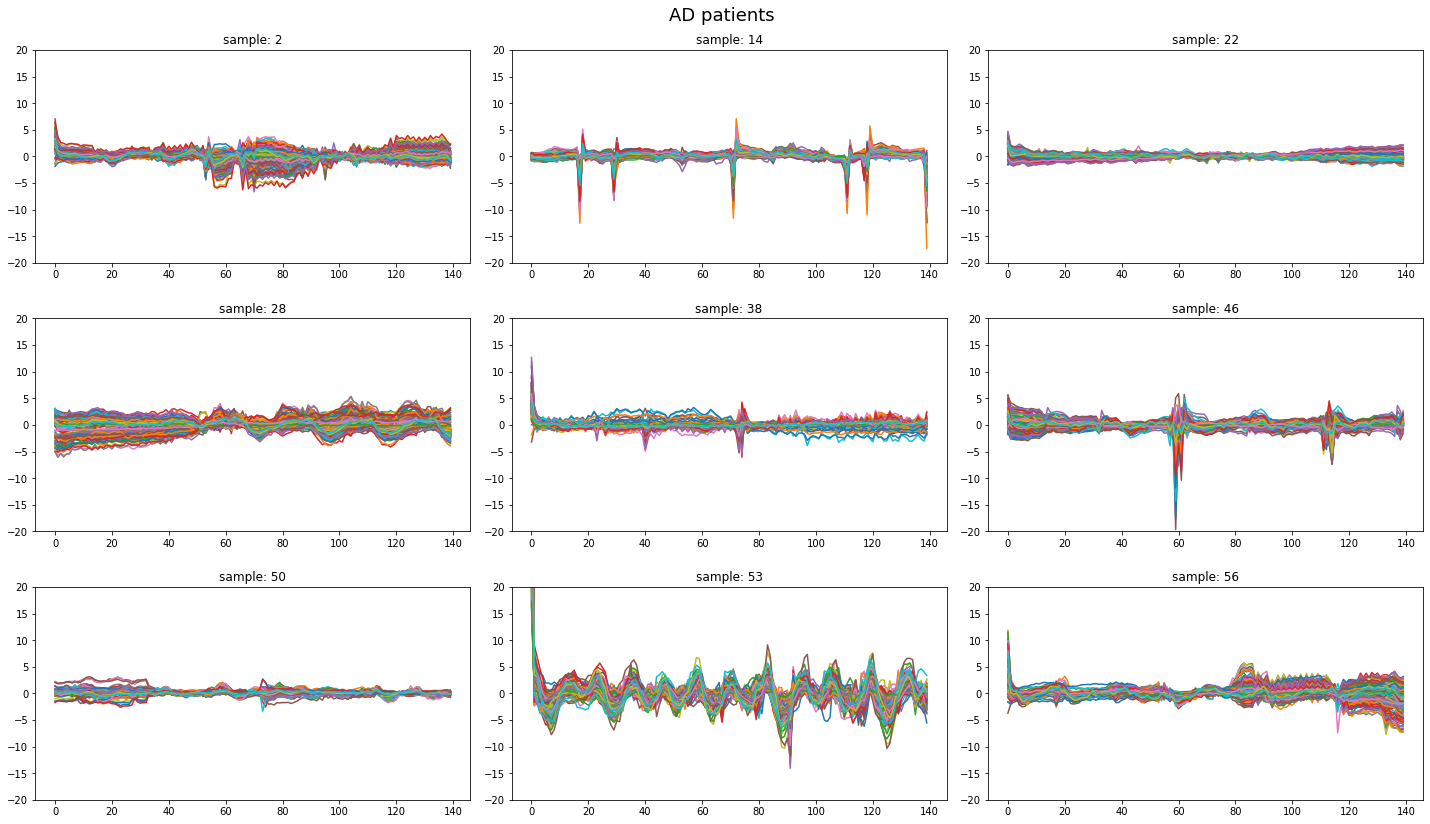

In [ ]:
visualize_samples('AD', min_range = 0, max_range = 9, num_rows = 3, num_cols = 3)

## Signal transformation

### Performing the transformations

In [ ]:
# wavlist = pywt.wavelist(kind = 'continuous')
# wavlist

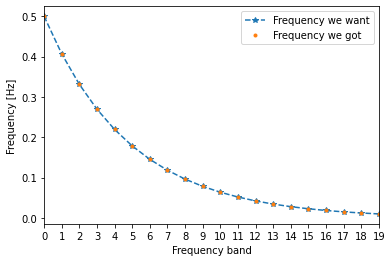

In [ ]:
# 140 * 3 = 420 s
# Downsampling across the whole range will lead to 1 / 420 = 0.002
# max frequency is 1 / 3 = 0.33 Hz
# Nyquist frequency limits this to half the sample frequency? (0.16)

frequency_range = (0.01, 0.5)
number_of_frequencies = 20
dt = 2 # I believe ADNI used TR = 3 s (0.33 Hz) https://link.springer.com/article/10.1007/s11682-016-9539-0

frequency_range_np = np.array(frequency_range)

s_spacing = (1.0 / (number_of_frequencies - 1)) * np.log2(
    frequency_range_np.max() / frequency_range_np.min()
)

scale = np.power(2, np.arange(0, number_of_frequencies) * s_spacing)

frequency_axis_np = frequency_range_np.min() * np.flip(scale)
plt.plot(frequency_axis_np, "--*")

frequency_axis = pywt.scale2frequency("cmor1.5-1.0", scale) / dt

plt.plot(frequency_axis, ".")
plt.legend(["Frequency we want", "Frequency we got"])
plt.xlim([0, number_of_frequencies - 1])
plt.xticks(np.arange(0, number_of_frequencies))
plt.ylabel("Frequency [Hz]")
plt.xlabel("Frequency band")
plt.show()

In [ ]:
# print(pywt.scale2frequency("cmor1.5-1.0", scale) / dt)
# print(pywt.scale2frequency("morl", scale) / dt)

In [ ]:
def create_cwt_images(X, scale_range, wavelet_name = 'morl', rescale=True, upsample=False, rescale_steps=30, rescale_scales=30):
    """
    Generate Continuous Wavelet Transform (CWT) array.

    Parameters
    ----------
        X : numpy.ndarray
            an array to be processed by the CWT transform, and
            must have a 3D shape of (samples,timeseries,features).
        scale_range : list of float
            the start and stop scale for the scale_range.
        wavelet_name : str, default 'morl'
            the mother wavelet that the CWT transform should use.
        rescale : bool, default True
            whether to rescale the output of the CWT transform to other dimensions
        upsample : bool, default False
            doubles the samples per timetrace
        rescale_scales : int, default 30
            the size to rescale the scales to if 'rescale' is set to True
        rescale_steps : int, default 30
            the size to rescale the steps to if 'rescale' is set to True

    Returns
    -------
        X_cwt : numpy.ndarray
            4D array of (samples, scales, timesteps, features).
    """
    # Reshape from (samples, features, timeseries) to (samples, timeseries, features)
    X = np.transpose(X, axes = (0, 2, 1))

    samples = X.shape[0]
    steps = X.shape[1]
    sensors = X.shape[2]

    x_dim = steps
    y_dim = len(scale_range)

    if upsample:
        x_dim = x_dim * 2

    if rescale:
        x_dim = rescale_steps
        y_dim = rescale_scales


    # prepare the output array
    X_cwt = np.ndarray(shape=(samples, y_dim, x_dim, sensors), dtype = 'float32')

    for sample in tqdm(range(samples),desc = 'Creating CWT images: '):

        for sensor in range(sensors):
            series = X[sample, :, sensor]
            # upsample
            if upsample:
                x = np.linspace(1,len(series),len(series)*2)
                xp = np.arange(1,len(series)+1,dtype='float32')
                series = np.interp(x, xp, series)
            # continuous wavelet transform
            coeffs, _ = pywt.cwt(series, scale_range, wavelet_name)
            # resize the 2D cwt coeffs
            if rescale:
                coeffs = resize(coeffs, (y_dim, x_dim), mode = 'constant')

            X_cwt[sample,:,:,sensor] = coeffs

            # del series, coeffs
            # gc.collect()

    return X_cwt

In [ ]:
X_cwt = create_cwt_images(X, scale, wavelet_name = "morl", rescale = False, upsample = False)

print(f"Shape (samples, scales, time, features) of X_cwt: {X_cwt.shape}")

Creating CWT images:   0%|          | 0/1185 [00:00<?, ?it/s]

Shape (samples, scales, time, features) of X_cwt: (1185, 20, 140, 200)


0

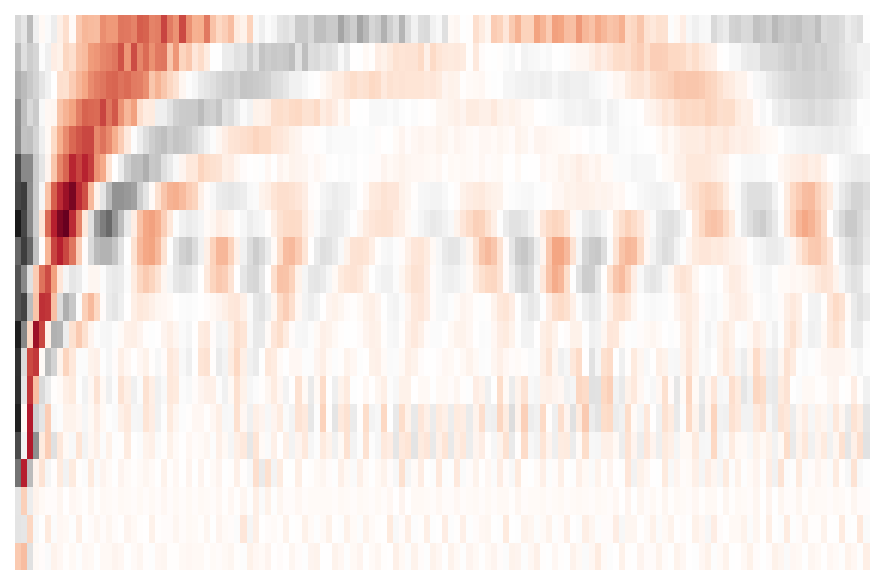

In [ ]:
selected_sample = 500
sample = X_cwt[selected_sample,:,:,:]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=150)

# Plot first channel
axes.pcolormesh(sample[:,:,0], cmap = 'RdGy')
axes.set_axis_off()
fig.tight_layout()

del sample
gc.collect()

### Save the wavelet transformed array

In [ ]:
# X_cwt_shape = X_cwt.shape
# X_cwt_dtype = X_cwt.dtype
# np.save('wavelet_transformed_data/X_cwt.npy'), X_cwt)
# del X_cwt
# gc.collect()

In [ ]:
# # Download file to local disk
# from google.colab import files
# files.download('wavelet_transformed_data/X_cwt.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load saved array as memmap

In [ ]:
X_cwt_memmap = np.load('wavelet_transformed_data/X_cwt.npy', mmap_mode = 'c')

In [ ]:
# X_cwt = np.load('wavelet_transformed_data/X_cwt.npy')

## Feature extraction

Generate a tabular dataset containing features generated by tsfresh from the time series data

In [ ]:
features_df = get_ts_features(X, y.astype(str))

Feature Extraction: 100%|██████████| 10/10 [01:41<00:00, 10.16s/it]


# Build and train multimodal model combining time series and tabular feature data

## Custom multiclassification metrics

In [ ]:
def balanced_accuracy(input, target):
  input, target = input.cpu(), target.cpu()
  input, target = flatten_check(input.argmax(axis = -1), target)
  output = balanced_accuracy_score(target, input)
  return output

# def balanced_f1(input, target):
#   input, target = input.cpu(), target.cpu()
#   input, target = flatten_check(input.argmax(axis = -1), target)
#   output = f1_score(target, input, average = 'weighted')
#   return output

## train/val split

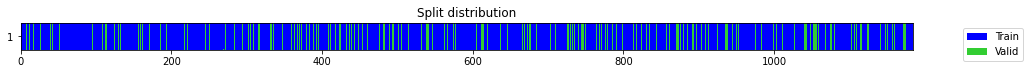

In [ ]:
 splits = get_splits(y, valid_size = .2, stratify = True, random_state = 42, shuffle = True)

## Tabular (features) dataloader and model

In [ ]:
cat_names = None
cont_names = features_df.columns[:-1]
y_names = 'target'
dls_features = get_tabular_dls(features_df,
                               cat_names = cat_names, cont_names = cont_names,
                               y_names = y_names, splits = splits)

In [ ]:
dls_features.one_batch()

(tensor([], device='cuda:0', size=(64, 0), dtype=torch.int64),
 tensor([[ 0.5247,  0.7589,  0.5247,  ..., -0.0548, -0.0910,  0.3163],
         [ 0.5247, -0.2259,  0.5247,  ..., -0.0632,  0.1474, -1.1167],
         [ 0.5247,  0.2302,  0.5247,  ..., -0.0794, -0.1155,  0.3425],
         ...,
         [ 0.5247,  0.7550,  0.5247,  ...,  0.1249,  0.0884, -0.0330],
         [-0.7069, -0.3711, -0.7069,  ..., -0.2774, -0.2894,  0.3088],
         [-0.5940, -0.5730, -0.5940,  ..., -0.2706, -0.2752,  0.2623]],
        device='cuda:0'),
 tensor([[3],
         [3],
         [0],
         [3],
         [3],
         [3],
         [3],
         [3],
         [3],
         [2],
         [1],
         [2],
         [0],
         [0],
         [1],
         [0],
         [3],
         [1],
         [0],
         [1],
         [0],
         [1],
         [3],
         [1],
         [2],
         [1],
         [3],
         [3],
         [1],
         [3],
         [2],
         [1],
         [2],
        

## Run the multimodal model on each of the frequencies of the wavelet transformed time series data

In [ ]:
# os.makedirs(os.path.join(data_path, "model_weights"))

In [ ]:
number_of_frequencies = 20
val_len = int(0.2 * len(X_cwt_memmap))
y_probas = np.empty((number_of_frequencies, val_len, 4))
y_pred = np.empty((number_of_frequencies, val_len))

epoch,train_loss,valid_loss,balanced_accuracy,time
0,1.226085,1.093610,0.511253,00:00
1,1.090387,0.957578,0.526351,00:00
2,0.995141,0.916490,0.542184,00:00
3,0.908226,0.915644,0.486174,00:00
4,0.824134,0.868019,0.559412,00:00
5,0.742931,0.868576,0.570458,00:00
6,0.651559,0.821780,0.607375,00:00
7,0.607762,0.977469,0.512063,00:00
8,0.548776,0.958339,0.588258,00:00
9,0.489300,1.021108,0.571045,00:00


KeyboardInterrupt: ignored

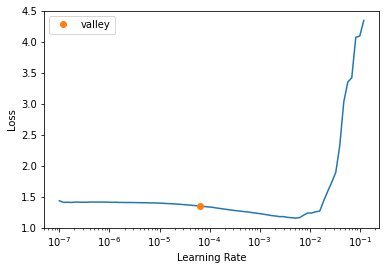

In [ ]:
for i in range(number_of_frequencies):

  X_scale = X_cwt_memmap[:, i, :, :]
  X_scale = np.transpose(X_scale, (0, 2, 1))

  # Raw data model
  tfms = [None, [Categorize()]]
  dls_ts = get_ts_dls(X_scale, y.astype(str), splits = splits, tfms = tfms)
  ts_model = MLSTM_FCNPlus(dls_ts.vars, dls_ts.c, seq_len = 140, se = 16, shuffle = False, bidirectional = True) # dls_ts.vars = 200, dls_ts.c = 4

  # Tabular model
  tab_model = build_tabular_model(TabModel, dls = dls_features)

  # Mixed model
  dls_mixed = get_mixed_dls(dls_ts, dls_features)
  multimodal_model = MultiInputNet(ts_model, tab_model)

  learn = Learner(dls_mixed, multimodal_model, metrics = balanced_accuracy)
  learn.lr_find()
  learn.fit_one_cycle(30, lr_max = 1e-3)

  export_path = os.path.join("model_weights", f"exp_20_morl_scale_{i}_min_features_lstm_fcn_30_epochs.pth")

  learn.export(export_path)

  y_probas[i], _, y_pred[i] = learn.get_preds(dl = dls_mixed.valid, with_decoded = True)

  del ts_model, multimodal_model, learn, dls_ts, dls_mixed
  gc.collect()

## Inference

In [ ]:
# number_of_frequencies = 20

# y_probas = np.empty((number_of_frequencies, len(y_val), 4))
# y_pred = np.empty((number_of_frequencies, len(y_val)))

In [ ]:
# for i in tqdm(range(number_of_frequencies)):

#   X_scale = X_cwt[:, i, :, :]

#   X_scale = np.transpose(X_scale, (0, 2, 1))

#   X_val_cwt = X_scale[splits][1]

#   import_path = os.path.join("model_weights", f"exp_20_morl_scale_{i}_lstm_fcn_30_epochs.pth")

#   learn = load_learner(import_path, cpu = False)

#   y_probas[i], _, y_pred[i] = learn.get_X_preds(X_val_cwt)

#   del import_path, learn
#   gc.collect()

## Voting ensemble

### Voting algorithm 1

In [ ]:
cumulative_prediction = []

for i in range(y_pred.shape[1]):
  pred_array = y_pred[:, i]
  values, counts = np.unique(pred_array, return_counts = True)
  idx = np.argmax(counts)
  cumulative_prediction.append(values[idx])

In [ ]:
cumulative_prediction = np.array(cumulative_prediction) + 1

cumulative_prediction

array([2., 1., 4., 1., 2., 3., 2., 2., 2., 2., 4., 2., 4., 2., 2., 3., 4.,
       2., 2., 2., 3., 1., 1., 3., 4., 4., 4., 4., 1., 2., 2., 3., 3., 4.,
       3., 2., 4., 2., 4., 2., 4., 4., 2., 2., 2., 4., 4., 4., 2., 4., 2.,
       1., 2., 4., 4., 3., 3., 2., 3., 4., 3., 3., 4., 2., 4., 4., 4., 3.,
       3., 4., 2., 3., 2., 2., 2., 4., 4., 2., 3., 1., 1., 2., 2., 4., 2.,
       4., 4., 2., 4., 3., 2., 4., 2., 2., 3., 4., 2., 1., 3., 2., 2., 4.,
       3., 3., 4., 1., 3., 1., 2., 3., 2., 4., 2., 2., 4., 4., 2., 4., 4.,
       4., 2., 4., 4., 4., 2., 4., 2., 2., 2., 3., 4., 4., 2., 2., 1., 3.,
       4., 2., 4., 4., 4., 1., 1., 2., 4., 4., 1., 2., 4., 4., 4., 2., 3.,
       2., 4., 3., 2., 3., 2., 4., 4., 2., 1., 4., 4., 2., 2., 4., 2., 4.,
       2., 2., 4., 3., 2., 2., 2., 4., 3., 4., 2., 4., 4., 1., 2., 4., 2.,
       3., 4., 4., 2., 4., 3., 4., 4., 2., 3., 2., 2., 4., 4., 2., 2., 2.,
       2., 3., 2., 4., 2., 2., 3., 4., 3., 1., 4., 4., 4., 4., 4., 4., 4.,
       2., 3., 3., 2., 2.

In [ ]:
np.mean(cumulative_prediction == y_val), balanced_accuracy_score(y_val, cumulative_prediction)

(0.7257383966244726, 0.6976570444170399)

### Voting algorithm 2

In [ ]:
cumulative_probas = np.mean(y_probas, axis = 0)
cumulative_prediction = np.argmax(cumulative_probas, axis = -1)
cumulative_prediction = cumulative_prediction + 1

In [ ]:
np.mean(cumulative_prediction == y_val), balanced_accuracy_score(y_val, cumulative_prediction)

(0.7088607594936709, 0.6840196645824769)